## Tarea 7 

* Temas
    - Gradient Boosting
    - Pipeline
    - Métricas de evaluación en clasificación
    
* Revisa los cuadernos entregados en la tarea para guiarte.

* Leer la documentación de [scikit-learn Machine Learning in Python](https://sklearn.org/).

* Nombre y apellidos: Sánchez Sauñe Cristhian Wiki



## Lista de preguntas:

1 .Usa `GradientBoostingRegressor` sobre el conjunto de datos `Bike`. Busca  sobre `learning_rate` y `max_depth` usando `GridSearchCV`. ¿ Qué ocurre si se cambia `n_estimators`?

Compare la velocidad de `XGBClassifier` con `GradientBoostingRegressor`. ¿Qué tan bien le va a `XGBClassifier` con los valores predeterminados en el conjunto de datos `Bike` ? ¿Puedes hacerlo mejor?

In [1]:
# Tu solucion
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
bike = pd.read_csv("./datos/bike_day_raw.csv")

In [11]:
bike.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [17]:
# ahora definiremos qué variables considerar importantes. Mirando los datos, queremos predecir el clima (1, 2 o 3), usando
# solo las variables 'season', 'mnth', 'temp', 'atemp', 'hum', 'windspeed'. Sobre las demás variables no se encontró mucha
# información

# prodecemos a hacer crop sobre las columnas no mencionadas
delete_list = ["holiday", "weekday", "workingday", "weathersit"]
X = bike.drop(delete_list, axis=1).values
y = bike.cnt.values


In [19]:
# división de lo datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
reg = GradientBoostingRegressor(random_state=0)




GradientBoostingRegressor(random_state=0)

In [29]:
# definimos los hiperparámetros para la búsqueda GRID
param_grid_1 = {'learning_rate': [0.001, 0.01, 0.1, 1, 0.005],
             'max_depth': [3, 6, 9, 12]}


In [30]:
# instanciamos la búsqueda grid
grid = GridSearchCV(reg, param_grid=param_grid_1)

# ahora entrenamos
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 0.005],
                         'max_depth': [3, 6, 9, 12]})

In [31]:
# hacemos una predicción

print("input: ", X_test[1:2])
print("target: ", y_test[1:2])
print("predicción: ", grid.predict(X_test[1:2]))

input:  [[3.       7.       0.75     0.686871 0.65125  0.1592  ]]
target:  [1]
predicción:  [1.14962339]


In [32]:
# evaluamos los puntajes obtenidos en nuestro conjunto de prueba
grid.score(X_test, y_test)

0.3762085743615763

In [33]:
print("Mejores parametros: ", grid.best_params_)

Mejores parametros:  {'learning_rate': 0.1, 'max_depth': 3}


In [34]:
# extendemos la búsqueda grid
param_grid_2 = {'n_estimators': [100, 50, 150, 180, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1, 0.005],
             'max_depth': [3, 6, 9, 12]}

# instanciamos la búsqueda grid
grid2 = GridSearchCV(reg, param_grid=param_grid_2)

# ahora entrenamos
grid2.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 0.005],
                         'max_depth': [3, 6, 9, 12],
                         'n_estimators': [100, 50, 150, 180, 200]})

In [35]:
grid2.score(X_test, y_test)

0.4177166694465374

In [42]:
print("Mejores hiperparámetros: ", grid2.best_params_)


'''Concluimos que n_estimators si influye a que nuestro modelo tenga un mejor resultado, pero sigue siendo bajo'''

Mejores parametros:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


'Concluimos que n_estimators si influye a que nuestro modelo tenga un mejor resultado, pero sigue siendo bajo'

In [45]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[01:22:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Puntaje en el conjunto de entrenamiento: 1.000000
Puntaje en el conjunto de prueba: 0.727273


'Conclusión: Se obtienen resultados mucho mejores que los resultados previos, y eso sin realizar \nuna búsqueda grid, esta técnica es muy eficaz. Se podría obtener resultados más que aceptables aplicando \ngridSearch o randomSearch'

In [46]:
# hacemos una predicción

print("input: ", X_test[1:2])
print("target: ", y_test[1:2])
print("predicción: ", xgb.predict(X_test[1:2]))

input:  [[3.       7.       0.75     0.686871 0.65125  0.1592  ]]
target:  [1]
predicción:  [1]


In [47]:
print("Puntaje en el conjunto de entrenamiento: %f" % xgb.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % xgb.score(X_test, y_test))


'''Conclusión: Se obtienen resultados mucho mejores que los resultados previos, y eso sin realizar 
una búsqueda grid, esta técnica es muy eficaz. Se podría obtener resultados más que aceptables aplicando 
gridSearch o randomSearch. Sin embargo, también se debe tratar el notable sobreajuste'''

Puntaje en el conjunto de entrenamiento: 1.000000
Puntaje en el conjunto de prueba: 0.727273


'Conclusión: Se obtienen resultados mucho mejores que los resultados previos, y eso sin realizar \nuna búsqueda grid, esta técnica es muy eficaz. Se podría obtener resultados más que aceptables aplicando \ngridSearch o randomSearch.'

2 .Carga el conjunto de datos `bank-campaign.csv`. Este conjunto de datos es el éxito de la comercialización de una campaña de marketing de banca telefónica. El objetivo es predecir el objetivo el resultado binario de que si un cliente se suscribió a un nuevo producto.

Divide los datos  en conjuntos de entrenamiento y pruebas usando `train_test_split`. Usa `cross-validation` para evaluar un clasificador de bosques aleatorios `RandomForestClassifier` en la parte de entrenamiento. Entonces usa `GridSearchCV` para ajustar los paramétros `max_features` y `max_depth`. Crea un mapa de calor con los resultados de la validación cruzada para todo el  grid.

Dibuja la influencia del `max_depth` en tiempo de ejecución.

In [72]:
bank = pd.read_csv("./datos/bank-campaign.csv")

# analizaremos un poco los datos
bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


In [60]:
# modificamos los targets

bank.target.replace('no', 0,inplace=True)
bank.target.replace('yes', 1,inplace=True)

bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [73]:
X = bank.drop("target", axis=1).values
y = bank.target.values

In [68]:
# división de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Usando validación cruzada en el bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)

cross_val = cross_validate(rfc, X_train, y_train,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)

pd.DataFrame(cross_val)

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,6.815790,0.603309,0.911474,1.0,0.638023,1.0,0.696518,1.0
1,6.921550,0.689397,0.913726,1.0,0.647820,1.0,0.712194,1.0
2,7.025877,0.650263,0.907413,1.0,0.594880,1.0,0.701346,1.0
3,7.600833,0.638710,0.907737,1.0,0.630767,1.0,0.688985,1.0
4,7.994208,0.675981,0.914859,1.0,0.653375,1.0,0.710559,1.0


In [69]:
# hacemos una predicción

print("input: ", X_test[1:2])
print("target: ", y_test[1:2])
print("predicción: ", rfc.predict(X_test[1:2]))

input:  [[ 5.5000e+01  2.4800e+02  2.0000e+00  9.9900e+02  0.0000e+00 -1.8000e+00
   9.3075e+01 -4.7100e+01  1.4050e+00  5.0991e+03  0.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  1.0000e+00  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00]]
target:  [0]
predicción:  [0]


In [75]:
print("Puntaje en el conjunto de entrenamiento: %f" % rfc.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % rfc.score(X_test, y_test))

'''Concluimos que no se sobreajusta tanto en el conjunto de prueba (aunque 0.99 en el data de 
entrenamiento si sugiere un sobreajuste que debemos tratar). Necesitamos añadir algunas otras técnicas de regularización'''

Puntaje en el conjunto de entrenamiento: 0.999968
Puntaje en el conjunto de prueba: 0.913081


'Concluimos que no se sobreajusta tanto en el conjunto de prueba (aunque 0.99 en el data de \nentrenamiento si sugiere un sobreajuste que debemos tratar). Necesitamos añadir algunas otras técnicas de regularización'

In [74]:
# ahora realizamos la búsqueda grid
param_grid_rfc = {'max_features': [50, 100, 150, 180, 200],
             'max_depth': [3, 6, 9, 12]}

# instanciamos la búsqueda grid
grid_rfc = GridSearchCV(rfc, param_grid=param_grid_rfc, cv=5)

# ahora entrenamos
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'max_features': [50, 100, 150, 180, 200]})

In [77]:
print("Puntaje en el conjunto de entrenamiento: %f" % grid_rfc.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % grid_rfc.score(X_test, y_test))
print("Mejores hiperparametros: ", grid_rfc.best_params_)

Puntaje en el conjunto de entrenamiento: 0.942864
Puntaje en el conjunto de prueba: 0.921531


3 .Carga el conjunto de datos `adult.csv`. Crea un pipeline usando `ColumnTransformer`, `OneHotEncoder`, `Scaling`, `polynomial features` y un `linear classifier`.

Encuentra las mejores opciones para `polynomial features` junto con la regularización de un modelo lineal.

```
pd.read_csv("datos/adult.csv", index_col=0).head()
```

Usa `OneHotEncoder(handle_unknown='ignore')` para ignorar nuevas categorías en el conjunto de pruebas.

In [42]:
adult = pd.read_csv("./datos/adult.csv")

# analizaremos un poco los datos
adult.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
# corrección de los datos de entrada para que sea manejables por el modelo
from sklearn.preprocessing import LabelEncoder
# ver https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

adult.loc[adult['income'] == ' >50K', 'predclase'] = 1
adult.loc[adult['income'] == ' <=50K', 'predclase'] = 0

adult['education'].replace('Preschool', 'dropout',inplace=True)
adult['education'].replace('10th', 'dropout',inplace=True)
adult['education'].replace('11th', 'dropout',inplace=True)
adult['education'].replace('12th', 'dropout',inplace=True)
adult['education'].replace('1st-4th', 'dropout',inplace=True)
adult['education'].replace('5th-6th', 'dropout',inplace=True)
adult['education'].replace('7th-8th', 'dropout',inplace=True)
adult['education'].replace('9th', 'dropout',inplace=True)
adult['education'].replace('HS-Grad', 'HighGrad',inplace=True)
adult['education'].replace('HS-grad', 'HighGrad',inplace=True)
adult['education'].replace('Some-college', 'CommunityCollege',inplace=True)
adult['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
adult['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
adult['education'].replace('Bachelors', 'Bachelors',inplace=True)
adult['education'].replace('Masters', 'Masters',inplace=True)
adult['education'].replace('Prof-school', 'Masters',inplace=True)
adult['education'].replace('Doctorate', 'Doctorate',inplace=True)

adult['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
adult['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
adult['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
adult['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
adult['marital-status'].replace(['Separated'], 'Separated',inplace=True)
adult['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
adult['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

adult.age = adult.age.astype(float)
adult['hours-per-week'] = adult['hours-per-week'].astype(float)

numero = LabelEncoder()
adult['workclass'] = numero.fit_transform(adult['workclass'])
adult['education'] = numero.fit_transform(adult['education'])
adult['marital-status'] = numero.fit_transform(adult['marital-status'])
adult['occupation'] = numero.fit_transform(adult['occupation'])
adult['relationship'] = numero.fit_transform(adult['relationship'])
adult['race'] = numero.fit_transform(adult['race'])
adult['gender'] = numero.fit_transform(adult['gender'])
adult['native-country'] = numero.fit_transform(adult['native-country'])
adult['predclase'] = numero.fit_transform(adult['predclase'])

adult['age-hours'] = adult['age']*adult['hours-per-week']

In [44]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures


In [45]:
adult.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,predclase,age-hours
0,0,39.0,7,9,13,4,1,1,4,1,2174,0,40.0,39,<=50K,0,1560.0
1,1,50.0,6,9,13,2,4,0,4,1,0,0,13.0,39,<=50K,0,650.0
2,2,38.0,4,11,9,0,6,1,4,1,0,0,40.0,39,<=50K,0,1520.0
3,3,53.0,4,1,7,2,6,0,2,1,0,0,40.0,39,<=50K,0,2120.0
4,4,28.0,4,9,13,2,10,5,2,0,0,0,40.0,5,<=50K,0,1120.0


In [46]:
# división de los datos
adult = adult.drop(["Unnamed: 0", "income"], axis=1)
X = adult.drop("predclase", axis=1)
y = adult.predclase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)


In [47]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  int32  
 2   education       32561 non-null  int32  
 3   education-num   32561 non-null  int64  
 4   marital-status  32561 non-null  int32  
 5   occupation      32561 non-null  int32  
 6   relationship    32561 non-null  int32  
 7   race            32561 non-null  int32  
 8   gender          32561 non-null  int32  
 9   capital-gain    32561 non-null  int64  
 10  capital-loss    32561 non-null  int64  
 11  hours-per-week  32561 non-null  float64
 12  native-country  32561 non-null  int32  
 13  predclase       32561 non-null  int64  
 14  age-hours       32561 non-null  float64
dtypes: float64(3), int32(8), int64(4)
memory usage: 2.7 MB


In [48]:
# cambiamos el orden de las columnas
cols = adult.columns.tolist()

cols[14], cols[13] = cols[13], cols[14]
cols

adult = adult[cols]
adult.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,age-hours,predclase
0,39.0,7,9,13,4,1,1,4,1,2174,0,40.0,39,1560.0,0
1,50.0,6,9,13,2,4,0,4,1,0,0,13.0,39,650.0,0
2,38.0,4,11,9,0,6,1,4,1,0,0,40.0,39,1520.0,0
3,53.0,4,1,7,2,6,0,2,1,0,0,40.0,39,2120.0,0
4,28.0,4,9,13,2,10,5,2,0,0,0,40.0,5,1120.0,0


In [49]:
# seleccionamos las columnas que vamos a transformar
ct_features = adult.columns[:14]
ct_features

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'age-hours'],
      dtype='object')

In [50]:
# usamos ColumnTransformer, OneHotEncoder y StandardScaler de acuerdo a como se pide en el problema

colTrans = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'), ct_features)],
                  remainder=StandardScaler())


In [51]:
from sklearn.linear_model import Ridge


pipe = make_pipeline(
    colTrans,
    PolynomialFeatures(),
    Ridge())


In [52]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'age-hours'],
      dtype='object'))])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [53]:
print("Puntaje en el conjunto de entrenamiento: %f" % pipe.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % pipe.score(X_test, y_test))

Puntaje en el conjunto de entrenamiento: 0.788992
Puntaje en el conjunto de prueba: 0.223410


In [59]:
# hacemos una predicción

print("input: ", X_test[1:2].values)
print("target: ", y_test[1:2].values)
print("predicción: ", pipe.predict(X_test[1:2]))

'''De momento vemos que el modelo inicial es malo (sobreajuste) para las predicciones en el conjunto de prueba'''

input:  [[2.70e+01 4.00e+00 9.00e+00 1.30e+01 4.00e+00 1.00e+01 1.00e+00 4.00e+00
  0.00e+00 0.00e+00 0.00e+00 4.00e+01 3.90e+01 1.08e+03]]
target:  [0]
predicción:  [-0.05309372]


In [81]:
'''IMPORANTE: Esta celda demora en ejecutarse'''

# un valor de alpha (float) grande, indica una mayor regularización del modelo
param_grid = {'ridge__alpha': [0.5, 5, 50]}
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'age-hours'],
      dtype='object'))])),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.5, 5, 50]})

In [82]:
print("Puntaje en el conjunto de entrenamiento: %f" % grid.score(X_train, y_train))
print("Puntaje en el conjunto de prueba: %f" % grid.score(X_test, y_test))

Puntaje en el conjunto de entrenamiento: 0.622886
Puntaje en el conjunto de prueba: 0.478801


In [83]:
# mostrando los mejores hiperparámetros
grid.best_params_

{'ridge__alpha': 50}

4 .Carga el conjunto de datos `adult` y realiza una división  en conjunto de entrenamiento y prueba. Aplica `grid-search` al conjunto de entrenamiento, buscando el mejor `C` para una regresión logística usando AUC. Dibuja la curva ROC y la curva precision-recall sobre el mejor modelo del conjunto de pruebas. 

In [65]:
# Usaremos los mismos datos del ejercicio 3, con la excepción de que no usaremos escalado ni OneHotEncodding

# como los datos de entrenamiento y validación ya estan divididos, no hace falta volver a dividirlos

# importamos e instanciamos el modelo de regresión
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=1000)

# C (float >= 0) es un hiperparámetro de soltura, cuando es más grande, se aplica poca regulaización, 
# y viceversa si se acerca a cero
param_grid = {'logisticregression__C': [0.25, 0.5, 1, 5, 10]}

model = make_pipeline(StandardScaler(), logReg)

# Usando la métrica del área bajo la curva AUC:
grid = GridSearchCV(model, param_grid=param_grid,
                    scoring=["roc_auc", 'average_precision', 'accuracy'],
                    refit='roc_auc')

grid.fit(X_train.values, y_train.values)
print("\nBusqueda grid con AUC")
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor puntaje obtenido en los datos de entrenamiento:", grid.best_score_)
print("Puntaje en los datos de prueba: %.3f" % grid.score(X_test.values, y_test.values))



Busqueda grid con AUC
Mejores hiperparámetros: {'logisticregression__C': 0.25}
Mejor puntaje obtenido en los datos de entrenamiento: 0.8548369597872327
Puntaje en los datos de prueba: 0.852


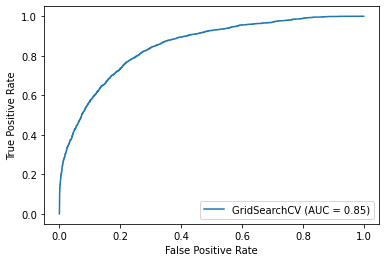

In [67]:
# Dibujaremos la curva ROC y la curva precision-recall sobre el mejor modelo del conjunto de pruebas.
from sklearn.metrics import plot_roc_curve
roc_logR = plot_roc_curve(grid, X_test.values, y_test.values)


In [70]:
from sklearn.metrics import roc_auc_score 
rl_auc = roc_auc_score(y_test.values, grid.predict(X_test.values))
print("AUC para la regresión logística: %f" % rl_auc)

AUC para la regresión logística: 0.697951


5 .Compara la velocidad  y exactitud de `LogisticRegression`, `LinearSVC` y `SGDClassifier` en el conjunto de datos `bank campaign` y `adult`. Prueba con `LogisticRegression(solver='sag')`

In [74]:
import time

# como ya hemos cargado los dataset previamente..
X_bank = bank.drop("target", axis=1).values
y_bank = bank.target.values

X_adult = adult.drop("predclase", axis=1).values
y_adult = adult.predclase.values

# dividimos los datasets
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size = 0.25, random_state=0)
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(X_adult, y_adult, test_size = 0.25, random_state=0)


print("X_bank_train: " + str(X_bank_train.shape))
print("X_bank_test: " + str(X_bank_test.shape))

print("\nX_adult_traint: " + str(X_adult_train.shape))
print("X_bank_test: " + str(X_bank_test.shape))

X_bank_train: (30891, 63)
X_bank_test: (10297, 63)

X_adult_traint: (24420, 14)
X_bank_test: (10297, 63)


In [78]:
import warnings
warnings.filterwarnings("ignore")


# LogisticRegression
lr_bank = LogisticRegression(solver='sag')
lr_adult = LogisticRegression(solver='sag')

start1 = time.time()
lr_bank.fit(X_bank_train, y_bank_train)
lr_adult.fit(X_adult_train, y_adult_train)
done1 = time.time()
elapsed1 = done1 - start1

# LinearSVC
from sklearn.svm import LinearSVC
svc_bank = LinearSVC(random_state=0, tol=1e-5)
svc_adult = LinearSVC(random_state=0, tol=1e-5)

start2 = time.time()
svc_bank.fit(X_bank_train, y_bank_train)
svc_adult.fit(X_adult_train, y_adult_train)
done2 = time.time()
elapsed2 = done2 - start2

# SGDClassifier
sgd_bank = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_adult = SGDClassifier(max_iter=1000, tol=1e-3)

start3 = time.time()
sgd_bank.fit(X_bank_train, y_bank_train)
sgd_adult.fit(X_adult_train, y_adult_train)
done3 = time.time()
elapsed3 = done3 - start3


In [79]:
print("LogisticRegression\n")
print("\tTiempo estimado de entrenamiento: {}".format(round(elapsed1, 3)))
print("\tPuntaje en el conjunto de prueba banco: {}".format(round(lr_bank.score(X_bank_test, y_bank_test), 3)))
print("\tPuntaje en el conjunto de prueba adulto: {}".format(round(lr_adult.score(X_adult_test, y_adult_test), 3)))

print("\nLinearSVC\n")
print("\tTiempo estimado de entrenamiento: {}".format(round(elapsed2, 3)))
print("\tPuntaje en el conjunto de prueba banco: {}".format(round(svc_bank.score(X_bank_test, y_bank_test), 3)))
print("\tPuntaje en el conjunto de prueba adulto: {}".format(round(svc_adult.score(X_adult_test, y_adult_test), 3)))

print("\nSGDClassifier\n")
print("\tTiempo estimado de entrenamiento: {}".format(round(elapsed3, 3)))
print("\tPuntaje en el conjunto de prueba banco: {}".format(round(sgd_bank.score(X_bank_test, y_bank_test), 3)))
print("\tPuntaje en el conjunto de prueba adulto: {}".format(round(sgd_adult.score(X_adult_test, y_adult_test), 3)))

LogisticRegression

	Tiempo estimado de entrenamiento: 7.981
	Puntaje en el conjunto de prueba banco: 0.906
	Puntaje en el conjunto de prueba adulto: 0.787

LinearSVC

	Tiempo estimado de entrenamiento: 17.537
	Puntaje en el conjunto de prueba banco: 0.904
	Puntaje en el conjunto de prueba adulto: 0.775

SGDClassifier

	Tiempo estimado de entrenamiento: 5.235
	Puntaje en el conjunto de prueba banco: 0.902
	Puntaje en el conjunto de prueba adulto: 0.773
